In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('processed_data.csv')
data.head(10)

,Unnamed: 0,location,total_sqft,bath,price,BHK
0,0,Electronic City Phase II,1056.0,2.0,39.07,2
1,1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,2,Uttarahalli,1440.0,2.0,62.00,3
3,3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,4,Kothanur,1200.0,2.0,51.00,2
5,5,Whitefield,1170.0,2.0,38.00,2
6,6,Old Airport Road,2732.0,4.0,204.00,4
7,7,Rajaji Nagar,3300.0,4.0,600.00,4
8,8,Marathahalli,1310.0,3.0,63.25,3
9,9,Gandhi Bazar,1020.0,6.0,370.00,6


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [6]:
data['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [7]:
data[data.BHK>20]

,location,total_sqft,bath,price,BHK
1697,2Electronic City Phase II,8000.0,27.0,230.0,27
4638,Munnekollal,2400.0,40.0,660.0,43


In [8]:
data.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

#### Add new feature as "price per sqrt"

In Most of the Cities to buy a land price_per_sqft is taken into account, hence this new feature will add value during the prediction

In [9]:
data1=data.copy()
data1['price_per_sqft']=data1['price']*1000000/data1['total_sqft']
data1.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000


In [10]:
len(data1.location.unique())

1298

In [11]:
data1.location=data1.location.apply(lambda x: x.strip())
location_stats=data1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [12]:
### from above Whitefield is mispelled to whitefiled,
data['location'] = data['location'].apply(lambda x:x.replace('whitefiled','Whitefield'))

#### the most Expensive/demanding in banglore are Whitefield, Sarjapur Road, Electronic City, Kanakpura road. 
* one reason would be be more companies could situated in these areas.
* high demanding area ~ higher price rates.

In [13]:
len(location_stats[location_stats<=10])

1047

In [14]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [15]:
data1.location=data1.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data1.location.unique())

241

In [16]:
data1[data1.total_sqft/data1.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,600.0,9.0,200.0,8,333333.333333
57,Murugeshpalya,1407.0,4.0,150.0,6,106609.808102
67,Devarachikkanahalli,1350.0,7.0,85.0,8,62962.962963
69,other,500.0,3.0,100.0,3,200000.000000


In [17]:
data2=data1[~(data1.total_sqft/data1.BHK<300)]
data2.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,1310.0,3.0,63.25,3,48282.442748
10,Whitefield,1800.0,2.0,70.00,3,38888.888889


### Remove the Outlier

In [18]:
data2["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count      12456.000000
mean       63085.028260
std        41681.273385
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: price_per_sqft, dtype: object

In [19]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3=remove_pps_outliers(data2)
data3.shape

(10242, 6)

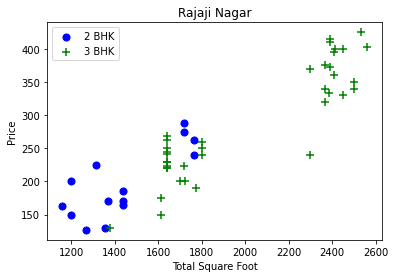

In [20]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Rajaji Nagar")

In [21]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data4=remove_bhk_outliers(data3)
data4.shape

(7317, 6)

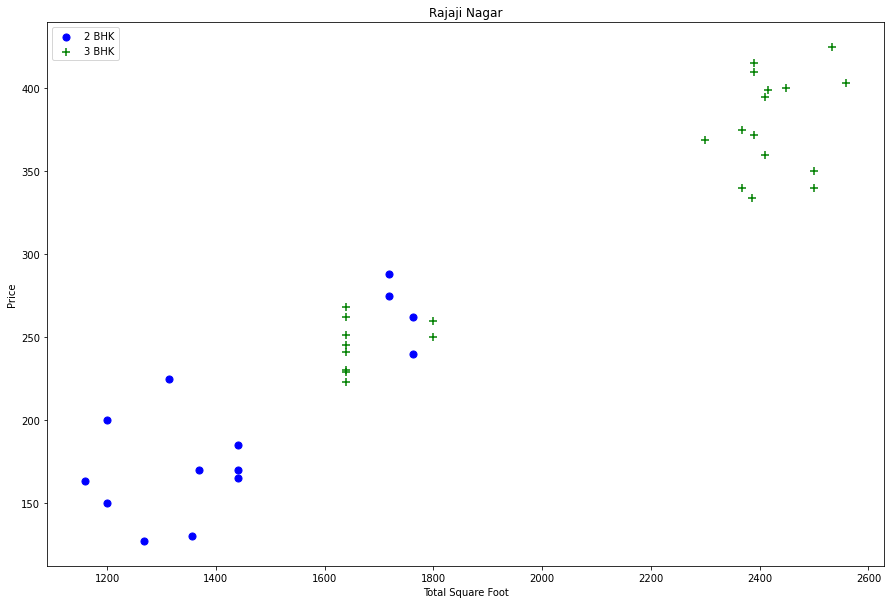

In [22]:
plot_scatter_chart(data4,"Rajaji Nagar")

Text(0, 0.5, 'Count')

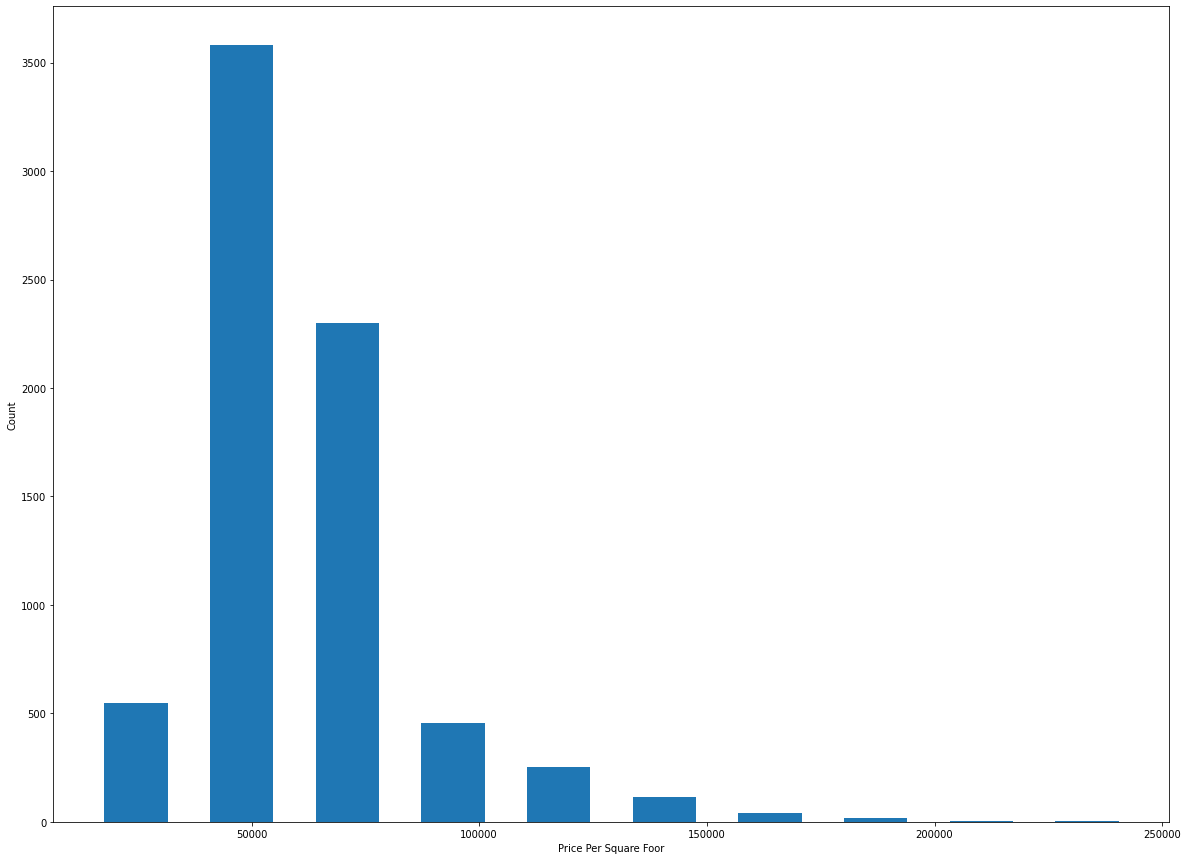

In [23]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

In [24]:
print(data4.bath.unique())
print('----------------------')
print(data4[data4.bath>10])

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]
----------------------
            location  total_sqft  bath  price  BHK  price_per_sqft
5277  Neeladri Nagar      4000.0  12.0  160.0   10     40000.00000
8483           other     12000.0  12.0  525.0   10     43750.00000
8572           other     10000.0  16.0  550.0   16     55000.00000
9306           other      6000.0  12.0  150.0   11     25000.00000
9637           other      5425.0  13.0  275.0   13     50691.24424


Text(0, 0.5, 'Count')

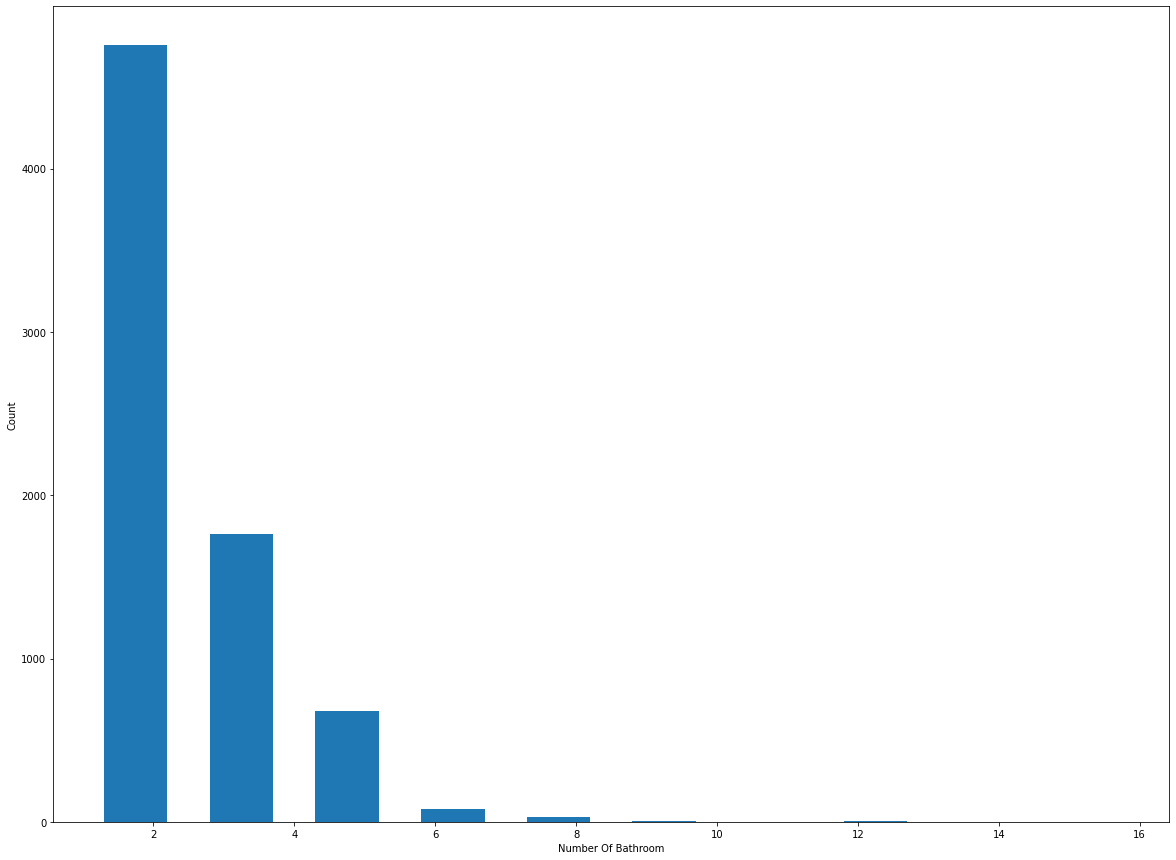

In [25]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [26]:
data4[data4.bath>data4.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,32520.325203
5238,Nagasandra,7000.0,8.0,450.0,4,64285.714286
6711,Thanisandra,1806.0,6.0,116.0,3,64230.343300
8408,other,11338.0,9.0,1000.0,6,88198.976892


In [27]:
data5=data4[data4.bath<data4.BHK+2]
data5.shape

(7239, 6)

In [29]:
data6=data5.drop(['price_per_sqft'],axis=1)
data6

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


In [30]:
dummies=pd.get_dummies(data6.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data7=pd.concat([data6,dummies.drop('other',axis='columns')],axis='columns')
data7.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data8=data7.drop('location',axis='columns')
data8.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data8.to_csv('Feature_engineering.csv')